<a href="https://colab.research.google.com/github/ThomazLonghi/heart_disease/blob/main/teste_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploração, Analise e tratamento dos dados: projeto Previsão doença cardíaca**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/curso/heart.csv', sep=',', encoding='iso-8859-1')

**## Exploração de dados**

In [ ]:
#head() -> mostra as cinco primeiras linhas
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
dados.shape

(918, 12)

## **Análise das Variáveis (Atributos)**

### **Age = idade**

In [ ]:
dados['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
dados['Age'].value_counts().sort_index() # retorna os dados em oredem crescente

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
hist1 = px.histogram (dados, x = 'Age', nbins = 60)
hist1.update_layout(width=800,height=500,title_text='Dsitribuição das idades')
hist1.show()

In [ ]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

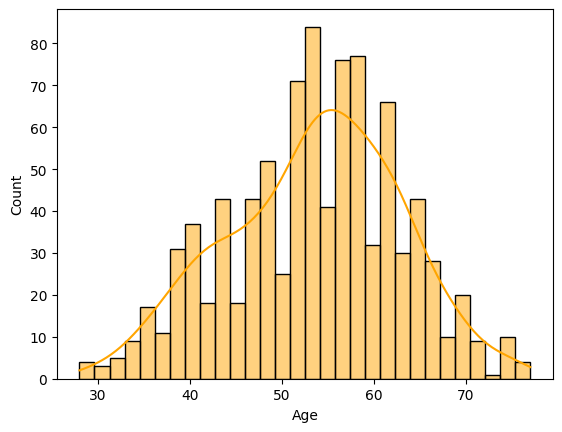

In [ ]:
sns.histplot(dados, x='Age', bins=30, color='orange', kde=True, stat='count')

In [ ]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

### **Sex = sexo**

<Axes: xlabel='Sex', ylabel='count'>

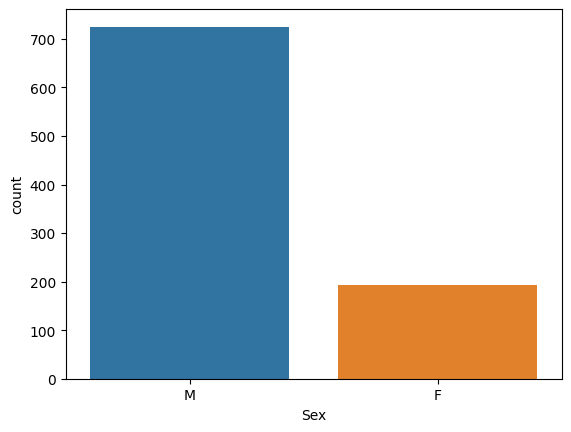

In [ ]:
sns.countplot(x='Sex', data=dados) # variavel categorica nominal (duas categorias de nome, masculino ou feminino)

### **Chest Pain Type = tipo de dor no peito**

In [ ]:
dados["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

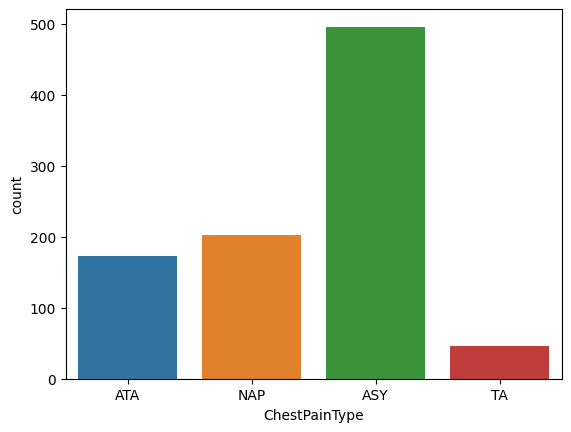

In [ ]:
sns.countplot(x='ChestPainType',data=dados)

### **Resting BP = Pressão sanguinea em repouso em mmHg(sistólica)**

In [ ]:
dados.RestingBP.value_counts().sort_index() # pode usar ['RestingBP'] também, da na mesma.

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

existe um probelma, a pressão na primeira linha está dizendo que exite 1 pacientre com pressão 0, ou seja, valor inválido.

<Axes: xlabel='RestingBP', ylabel='Count'>

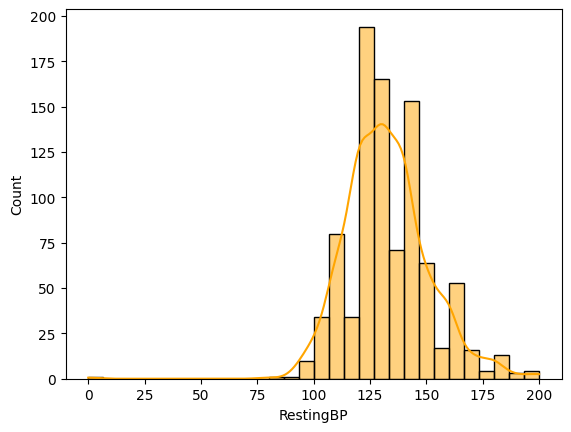

In [ ]:
sns.histplot(dados, x='RestingBP', bins=30, color='orange', kde=True, stat='count')

### **Colesterol**

In [ ]:
dados['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

erro: 172 pessoas com colesterol 0

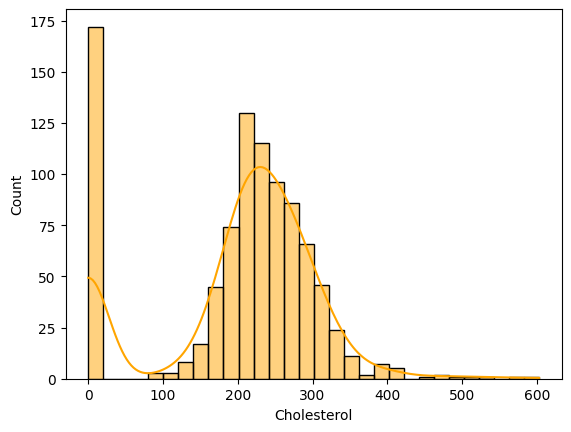

In [ ]:
sns.histplot(dados, x='Cholesterol', bins=30, color='orange', kde=True, stat='count');

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [ ]:
dados['FastingBS'].value_counts() # 0 -> não diabetico / 1 -> diabetico

0    704
1    214
Name: FastingBS, dtype: int64

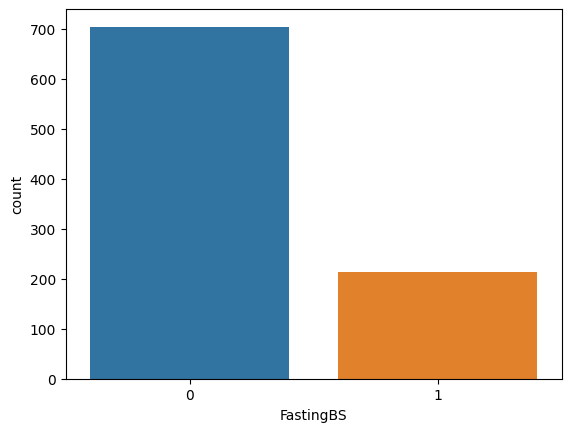

In [ ]:
sns.countplot(x='FastingBS', data=dados); # varivel categorica ordinal (separando em duas categorias, 0 ou 1)

### **Resting ECG = eletrocardiograma em repouso**

In [ ]:
dados['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

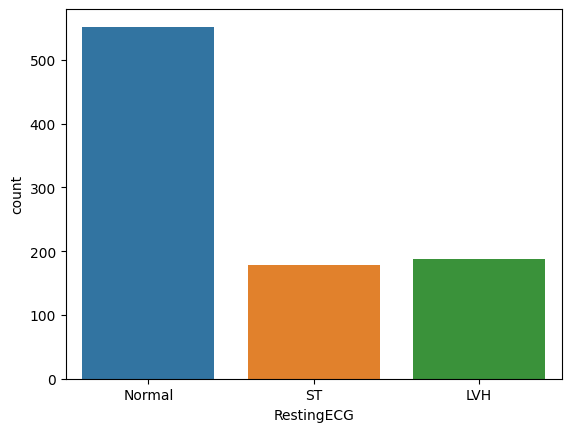

In [ ]:
sns.countplot(x = 'RestingECG',data=dados ) # varaivel categorica nominal

### **Max HR (heart hate) = freuqência cadíaca maxima**

In [ ]:
dados['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

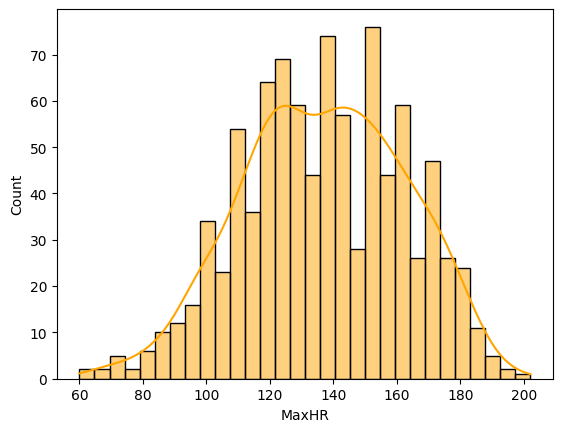

In [ ]:
sns.histplot(dados, x ="MaxHR", bins=30, color="orange", kde=True, stat="count") #variavel numerica continua (pode ter qualquer valor e possui grande dispersão de dados)

### **Excercise Angina = Angina induzida po exercicio**

In [ ]:
dados['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
px.pie(dados, 'ExerciseAngina') # variavel categorica nominal

### **Old Peak = Drepressão de ST( refência no ECG) induzida por exercicio em relação ao repouso**

In [ ]:
dados['Oldpeak'].value_counts().sort_index()

-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: Oldpeak, dtype: int64

<Axes: xlabel='Oldpeak', ylabel='Count'>

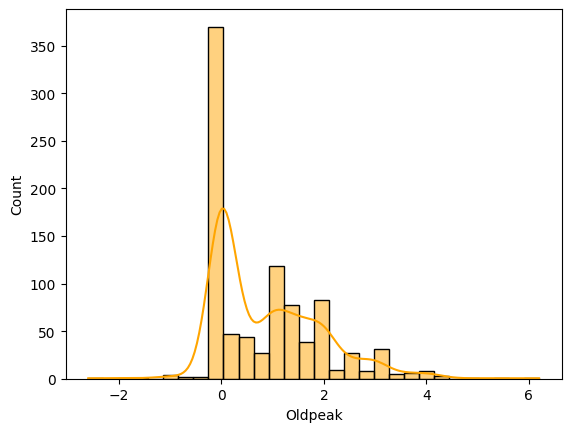

In [ ]:
sns.histplot(dados, x="Oldpeak", bins=30, color='orange', kde=True, stat="count") # variavel numerica continua ( pode aparecer qualquer valor)

### **ST_Slope = Inclinação do segmento ST no ECG**

In [ ]:
dados['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
px.pie(dados, 'ST_Slope')

### **Heart Desease = Doença Cardiaca**

In [ ]:
dados['HeartDisease'].value_counts() # Atributo ALVO -> é isso que a gente quer que o nosso algoritmo consiga prever, dizendo se a pessoa tem tendencia cardiaca ou nao

1    508
0    410
Name: HeartDisease, dtype: int64

0 = não possui doença cardiaca

1 = possui doença cardiaca

In [ ]:
px.pie(dados, 'HeartDisease')

### **Análise dos atributos**

In [ ]:
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### **Valores missing(NAN)**

In [ ]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#ados2 seria a nova tabela com os valores NAN ecluidos. Assim não altera a tabela original
dados2 = dados.dropna()

In [ ]:
dados2.shape

(918, 12)

In [ ]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Subistituir os valores missing pela média
dados2['Age'].fillna(dados2['Age'].mean(), inplace=True)

In [ ]:
##Subistituir os valores missing por qualquer outro valor
dados2['Age'].fillna(10, inplace=True)

### **Análises Estatísticas Descritvas**

In [ ]:
dados.describe() # media e mediana muito proximos tende a ser uma distribuiçao normal
# std -> desvio padrão
# mean -> média

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Tratando valores incoerentes**

Excluindo registro com valor Zero

In [ ]:
dados2 = dados.loc[dados.RestingBP != 0]
dados2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
dados.shape

(918, 12)

In [ ]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Substituindo valores Zero Colesterol pela média sem os zeros

In [ ]:
dados2.Cholesterol.value_counts() # Como tem 171 registros de valor 0, não podemos excluir e por isso, vamos substiutir pela média para nao afetar tanto o algoritmo

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
dados2.Cholesterol.mean() # essa media ainda esta contando os zeros

199.0163576881134

In [ ]:
dados2.Cholesterol.replace(0, np.NaN, inplace=True)

<ipython-input-48-a3214f6a1c6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum() # mostra que os valores 0 foram excluidos

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [ ]:
dados2.Cholesterol.mean() # media com os valores 0 excluidos

244.6353887399464

In [ ]:
dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)

<ipython-input-51-1e69ed80723a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum() # agora nao tem mais valores missing

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

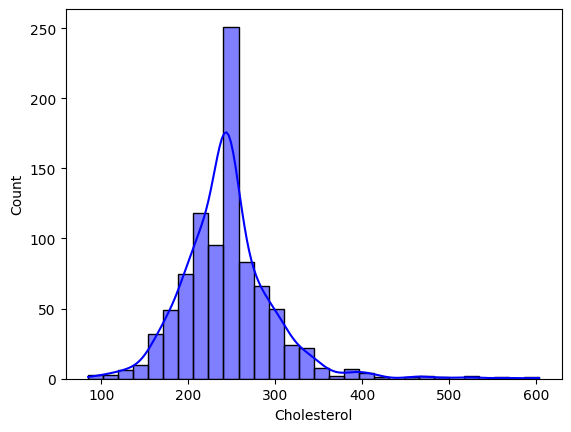

In [ ]:
sns.histplot(dados2, x='Cholesterol', bins=30, color='blue', kde=True, stat='count')

In [ ]:
#idade
px.box(dados2, y="Age")

In [ ]:
#Pressão sanguinea
px.box(dados2, y="RestingBP")

In [ ]:
#coleterol
px.box(dados2, y='Cholesterol')

In [ ]:
#Frequencia cardiac maxima
px.box(dados2, y="MaxHR")

## **Salvando (Exportando) DataFrame Tratado**

In [ ]:
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)

# **Aprendizagem Supervisioada: Classifcação**

## **Pré-Processamento**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/curso/heart_tratado.csv', sep=';', encoding='iso-8859-1')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(917, 12)

### **Transformando variaveis categoricas nominais em variaveis categoricas ordinais**

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2['Sex'].replace({'M':0, 'F': 1}, inplace =True)
df2['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}, inplace=True)
df2['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df2['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
df2['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

In [ ]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [ ]:
previsores = df2.iloc[:, 0:11].values  #vai pegar apenas os valores e armazenar na variavel em formato de matriz

In [ ]:
previsores # array matriz

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
previsores.shape

(917, 11)

In [ ]:
alvo = df2.iloc[:, 11].values

In [ ]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
alvo.shape

(917,)

### **Análise das escalas dos atributos (Escalonamento)**

In [ ]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [ ]:
 #Padronização - Utiliza a média e o desvio padrão com refência

 #Normalização -> Utiliza os valores máximo e mínimo como refência

In [ ]:
from sklearn.preprocessing import StandardScaler # utiliza padronização

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc # variavel previsores com o escalonamento

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)  # foi transformando em DataFrame para ter uma visualização melhor
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [ ]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


## **Codificação de variaveis categoricas**

### **LabelEncoder: traansformação de variaveis categoricas numericas**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
previsores2 = df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [ ]:
previsores2[:, 1] = LabelEncoder().fit_transform(previsores2[:, 1])
previsores2[:, 2] = LabelEncoder().fit_transform(previsores2[:, 2])
previsores2[:, 6] = LabelEncoder().fit_transform(previsores2[:, 6])
previsores2[:, 8] = LabelEncoder().fit_transform(previsores2[:, 8])
previsores2[:, 10] = LabelEncoder().fit_transform(previsores2[:, 10])

In [ ]:
previsores2

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

### **OneHotEncoder: Criação de variaveis Dummy (ficticia)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ColumnTransformer?

Parãmetro ColumnTransformer


*    name - nome dado a a transformação
*    transformer - tipo de estimador (OneHotEncoder)


*   columns - colunas que serão transformadas


*   remainder - o quea acontecera com o restante das colunas não relacionadas

    drop = exclui as outras colunas
    passthrough = mantém as ourtras colunas. drop é default.
*    sparse-threshold - parâmetro de classificação de matriz esparsas. default é 0.3

*     n_jobs - número de trabalhos a serm executados em paralelo. default é nenhum
*    transfomer-weights - definição de pesos aos transformadores

*    
  verbose - default é False. Se for Ture a execução é apresentada na tela   






  













In [ ]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough').fit_transform(previsores2)

In [ ]:
previsores3

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 1.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [ ]:
previsores3.shape # Antea tinhamos apenas 11 atributos(colunas) e agora temos 20 porque o OneHotEncoder criou mais 9 atributos dummy(ficticios) para cada tipo de classe

(917, 20)

In [ ]:
previsores3df = pd.DataFrame(previsores3)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289.0,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37,130,283.0,0,98,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195.0,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,45,110,264.0,0,132,1.2
913,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,68,144,193.0,1,141,3.4
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57,130,131.0,0,115,1.2
915,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,57,130,236.0,0,174,0.0


precisa de um escalonamento poisa mutiso numeros variados muito distantes um do outro

In [ ]:
df.head() # Compare com o original (df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## **Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [ ]:
previsores3_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [ ]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,-0.516309,0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.936826,-1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [ ]:
previsores3df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,1.937139e-17,-3.874279e-17,3.874279e-17,6.973702e-17,0.000000,-9.298269e-17,1.549712e-17,-4.261707e-17,4.261707e-17,8.523413e-17,0.000000,-3.874279e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,-8.243101e-01,-2.716072e-01,0.998910,-8.698879e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,1.213136e+00,-2.716072e-01,0.998910,1.149573e+00,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,9.212982e-01,2.073784e+00,1.881384e+00,4.351412e+00,1.969177,8.150134e-01,2.037569e+00,8.243101e-01,1.213136e+00,3.681787e+00,0.998910,1.149573e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


## **Redução de Dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para o treinamento do algoritmo, através da análise das correlações entras as variáveis.

### **Análise dos Componentes Principais (PCA)**

**Seleção de caracteristicas**: seleciona os melhores atributos e utiliza sem tranformações.

**Extração de caracteristicas**: encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4, svd_solver='auto') # n_components -> numero de atributos / svd_solver -> o ideal é deixar no 'auto' porque ele escolhe automaticamente o melhor a ser usado.

In [ ]:
previsores_pca = pca.fit_transform(previsores2)

In [ ]:
previsores_pca.shape

(917, 4)

In [ ]:
#Componentes principais
previsores_pca

array([[  44.01218603,  -36.15137592,   10.64727631,   -9.47126222],
       [ -63.9918455 ,  -13.93849233,   31.69212503,   -5.30052573],
       [  38.53844277,   33.91712222,  -12.48837374,  -21.53860158],
       ...,
       [-113.3467467 ,   23.48595247,   -2.51064362,    1.14935806],
       [  -9.1141306 ,  -35.90083188,    4.81814643,    9.1238555 ],
       [ -70.01342608,  -35.68741686,   12.10984845,  -10.51663588]])

In [ ]:
#razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.72847929, 0.17183534, 0.08122019, 0.01767209])

In [ ]:
# Soma das variaávies explicativas
pca.explained_variance_ratio_.sum()

0.9992069186607342

### **Kernel PCA**

É um algoritmo de aprendizagem não supervisioanda.

Aplica-se também em dados linearmnte não separáveis.

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=4, kernel='rbf')

In [ ]:
previsores_kernel = kpca.fit_transform(previsores2)

In [ ]:
previsores_kernel.shape

(917, 4)

In [ ]:
previsores_kernel

array([[-0.00249772, -0.00290225, -0.0027372 , -0.00191636],
       [-0.00249877, -0.00290359, -0.00273854, -0.00191743],
       [-0.00249785, -0.00290241, -0.00273736, -0.00191649],
       ...,
       [-0.00249774, -0.00290227, -0.00273723, -0.00191638],
       [-0.00249793, -0.00290252, -0.00273748, -0.00191659],
       [-0.00249772, -0.00290225, -0.0027372 , -0.00191637]])

### **Análise do Discriminante Lienar (LDA: Lienar Discriminat ANalysis)**

Algoritmo de aprendizagem supervisionada pois utiliza a classe como refenrênciapara seleção.

Aplicado em situações com muitos atributos previsores e també com o atributo alvo com muitas classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

In [ ]:
previsores_lda = lda.fit_transform(previsores2, alvo) # além dos atributos previsores, ele também precisa do atributo alvo porque é supervisionado para ser a referência

In [ ]:
previsores_lda

array([[-1.47297727],
       [-1.41360735],
       [-0.96705302],
       [ 0.53331037],
       [-1.45783427],
       [-1.78559221],
       [-2.28906835],
       [-1.26844095],
       [ 1.03044735],
       [-1.8033219 ],
       [-2.56103248],
       [ 1.08833702],
       [-1.4298088 ],
       [ 1.02172609],
       [-2.51881925],
       [-0.75582909],
       [-0.27447783],
       [-2.33841952],
       [ 0.50562225],
       [ 0.03155735],
       [-2.89530718],
       [-0.23402029],
       [-2.26833719],
       [ 0.97019565],
       [-1.70998121],
       [-2.0730337 ],
       [ 1.62722174],
       [-0.96486408],
       [-1.52502126],
       [-1.33460621],
       [-0.03948873],
       [-1.44459749],
       [ 0.63936919],
       [ 0.34808635],
       [-2.23945383],
       [-1.48957548],
       [ 2.4746182 ],
       [-2.13691975],
       [-1.54252555],
       [ 0.30741381],
       [-1.8748176 ],
       [-0.26749988],
       [-1.51713745],
       [-1.79186716],
       [ 1.00348547],
       [ 0

In [ ]:
lda.explained_variance_ratio_

array([1.])

# **Salvando Variáveis (atributos)**

In [ ]:
import pickle

In [ ]:
#Criando arquivo
arq1 = open('heart.pkl','wb') # pkl -> extensão de pickle / wb -> para salvar

In [ ]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [ ]:
# Fechando arquivo
arq1.close()

In [ ]:
# lendo arquivo
arq1= open('heart.pkl', 'rb') # rb -> para ler o arquivo

In [ ]:
# Chamando a variável
alvo = pickle.load(arq1)

In [ ]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Criando arquivos e salvando as variáveis
arq2 = open('heart2.pkl', 'wb')
pickle.dump(previsores, arq2)

arq3 = open('heart3.pkl', 'wb')
pickle.dump(previsores_esc, arq3)

arq4 = open('heart4.pkl', 'wb')
pickle.dump(previsores2, arq4)

arq5 = open('heart5.pkl', 'wb')
pickle.dump(previsores3, arq5)

arq6 = open('heart6.pkl', 'wb')
pickle.dump(previsores3_esc, arq6)





# **BASE DE TREINO E TESTE**

In [ ]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:


*   arrays: nomes dos atributos e alvo
*   test_size: tamanho da porcentagem dos dados de teste. default é none

*   train_size: tamanho em porcentagem dos dados de treinamento. default é none

*   rando_state: nomeação de um estado aleatório
*   shuffle: embaralhamento dos dados aleatórios. Associado com random_state ocorre o mesmo embaralhamento sempre. default é True


*   stratify: possibilidade de dividir os dados em fomra estratificada. default é none (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 0% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção)





In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(641, 11)

In [ ]:
x_teste. shape

(276, 11)

In [ ]:
y_treino.shape

(641,)

In [ ]:
y_teste.shape

(276,)

# **Naive Byes**

Treinamento do algoritmo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit(x_treino, y_treino) # treinamento com os dados de trieno

GaussianNB()

Avaliação do algoritmo

In [ ]:
previsoes_naive = naive.predict(x_teste) # vai retornar as previoes com o x_teste
previsoes_naive

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Acuracia

In [ ]:

accuracy_score(y_teste, previsoes_naive) # compara o y_teste com o previsoes_naive

0.8478260869565217

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_naive) * 100))

Acurácia: 84.78%


Verificando performance com relação ao teste

In [ ]:
confusion_matrix(y_teste, previsoes_naive) # diagonal 100 e 134 são os acertos / 21 e 21 são os erros

array([[100,  21],
       [ 21, 134]])

In [ ]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.86      0.86      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



### **Análise dados de treino**

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8611544461778471

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[248,  41],
       [ 48, 304]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)
resultado # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.87096774, 0.87096774, 0.90322581, 0.80645161, 0.77419355,
       0.90322581, 0.70967742, 0.87096774, 0.77419355, 0.87096774,
       0.90322581, 0.77419355, 0.93548387, 0.90322581, 0.87096774,
       0.87096774, 0.87096774, 0.93333333, 0.93333333, 0.9       ,
       0.76666667, 0.83333333, 0.8       , 0.7       , 0.83333333,
       0.93333333, 0.86666667, 0.9       , 0.86666667, 0.8       ])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado.mean() * 100))

Acurácia Média: 85.17%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

# **Maquinas de Vetoree de Suporte (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=1, C = 2)
svm.fit(x_treino, y_treino)

SVC(C=2, random_state=1)

In [ ]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia %.2f%%' % (accuracy_score(y_teste, previsoes_svm) * 100))

Acurácia 86.23%


In [ ]:
confusion_matrix(y_teste, previsoes_svm)

array([[ 99,  22],
       [ 16, 139]])

In [ ]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       121
           1       0.86      0.90      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



Análise de treino

In [ ]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9282371294851794

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[257,  32],
       [ 14, 338]])

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_svc = SVC(kernel='rbf', random_state=1, C = 2.0)
resultado_svc = cross_val_score(modelo_svc, previsores3_esc, alvo, cv = kfold)
resultado_svc # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.96774194, 0.83870968, 0.87096774, 0.90322581, 0.83870968,
       0.87096774, 0.70967742, 0.87096774, 0.80645161, 0.80645161,
       0.87096774, 0.80645161, 0.96774194, 0.90322581, 0.80645161,
       0.83870968, 0.80645161, 0.93333333, 0.86666667, 0.93333333,
       0.83333333, 0.86666667, 0.86666667, 0.63333333, 0.83333333,
       0.93333333, 0.9       , 0.86666667, 0.9       , 0.86666667])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_svc.mean() * 100))

Acurácia Média: 85.72%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM - 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=200, penalty='l2', tol=0.0001, C =1, solver='lbfgs')
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=200, random_state=1)

In [ ]:
logistica.intercept_

array([0.27651292])

In [ ]:
logistica.coef_

array([[-0.31429216,  0.31429216,  0.51145815, -0.41291678, -0.17911607,
        -0.08746201,  0.05928251, -0.00197428, -0.05806686, -0.21969455,
         0.21969455, -0.01971658,  0.60969113, -0.6055519 ,  0.1808035 ,
        -0.00090394,  0.18908439,  0.43510469, -0.22824874,  0.29941155]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste) # com os dados de teste
previsoes_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %2.f%%' % (accuracy_score(y_teste, previsoes_logistica) * 100))

Acurácia: 86%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[102,  19],
       [ 19, 136]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica)) # conmpara o y_teste com as previoes do algoritmo

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.88      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



Análise dados de treino

In [ ]:
previsoes_treino = logistica.predict(x_treino) # com os dados de treino
previsoes_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino,previsoes_treino)

0.858034321372855

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[237,  52],
       [ 39, 313]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_logistica = LogisticRegression( random_state=1, max_iter=200, penalty='l2', tol=0.0001, C =1, solver='lbfgs')
resultado_logistica = cross_val_score(modelo_logistica, previsores3_esc, alvo, cv = kfold)
resultado_logistica # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.93548387, 0.83870968, 0.90322581, 0.77419355, 0.87096774,
       0.90322581, 0.70967742, 0.87096774, 0.83870968, 0.87096774,
       0.87096774, 0.80645161, 0.96774194, 0.83870968, 0.80645161,
       0.90322581, 0.80645161, 0.96666667, 0.96666667, 0.86666667,
       0.83333333, 0.86666667, 0.86666667, 0.7       , 0.83333333,
       0.93333333, 0.9       , 0.83333333, 0.83333333, 0.83333333])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_logistica.mean() * 100))

Acurácia Média: 85.83%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

# **Aprendizagem Baseada e Instâncias**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric ='minkowski', p=2)
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_knn) * 100))

Acurácia: 84.78%


In [ ]:
print(confusion_matrix(y_teste, previsoes_knn))

[[ 98  23]
 [ 19 136]]


In [ ]:
print(classification_report(y_teste, previsoes_knn))

Análise dados de treino

In [ ]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8939157566302652

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[249,  40],
       [ 28, 324]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5, metric ='minkowski', p=2)
resultado_knn = cross_val_score(modelo_knn, previsores3_esc, alvo, cv = kfold)
resultado_knn # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.93548387, 0.83870968, 0.87096774, 0.83870968, 0.83870968,
       0.90322581, 0.74193548, 0.87096774, 0.77419355, 0.87096774,
       0.87096774, 0.77419355, 0.96774194, 0.90322581, 0.87096774,
       0.80645161, 0.87096774, 0.93333333, 0.9       , 0.96666667,
       0.76666667, 0.76666667, 0.86666667, 0.73333333, 0.83333333,
       0.93333333, 0.9       , 0.86666667, 0.86666667, 0.86666667])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_knn.mean() * 100))

Acurácia Média: 85.83%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

# **Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='gini', random_state =0, max_depth=3 )
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_arvore) * 100))

Acurácia: 83.70%


In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[ 98,  23],
       [ 22, 133]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       121
           1       0.85      0.86      0.86       155

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



Análise dados de treino

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8658346333853354

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[233,  56],
       [ 30, 322]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state =0, max_depth=3)
resultado_arvore = cross_val_score(modelo_arvore, previsores3_esc, alvo, cv = kfold)
resultado_arvore # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.90322581, 0.80645161, 0.90322581, 0.87096774, 0.83870968,
       0.83870968, 0.67741935, 0.77419355, 0.80645161, 0.80645161,
       0.77419355, 0.87096774, 0.93548387, 0.80645161, 0.90322581,
       0.87096774, 0.80645161, 0.93333333, 0.8       , 0.8       ,
       0.73333333, 0.86666667, 0.8       , 0.76666667, 0.83333333,
       0.9       , 0.86666667, 0.86666667, 0.73333333, 0.86666667])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_arvore.mean() * 100))

Acurácia Média: 83.20%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

Arvore de Decisão = 83,70% - 231 acertos e 83,20% (validaçõa cruzada)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='gini', random_state = 0, max_depth=5) # n_estiamtors -> numero de estimadores / creiterion -> critério
random.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_random) * 100))

Acurácia: 84.78%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[100,  21],
       [ 26, 129]])

In [ ]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       121
           1       0.86      0.83      0.85       155

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



Análise dados de treino

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9017160686427457

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[249,  40],
       [ 23, 329]])

##***Validação Cruzada***

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_random = RandomForestClassifier(n_estimators=150, criterion='gini', random_state =0, max_depth=5)
resultado_random = cross_val_score(modelo_random, previsores3_esc, alvo, cv = kfold)
resultado_random # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

array([0.96774194, 0.87096774, 0.87096774, 0.87096774, 0.90322581,
       0.87096774, 0.70967742, 0.87096774, 0.83870968, 0.80645161,
       0.83870968, 0.74193548, 1.        , 0.93548387, 0.83870968,
       0.90322581, 0.80645161, 0.96666667, 0.93333333, 0.96666667,
       0.76666667, 0.86666667, 0.83333333, 0.7       , 0.86666667,
       0.93333333, 0.9       , 0.86666667, 0.9       , 0.83333333])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_random.mean() * 100))

Acurácia Média: 86.59%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

Arvore de Decisão = 83,70% - 231 acertos e 83,20% (validaçõa cruzada)

Random Forest = 84,79% - 229 acertos e 86,59% (validação cruzada)





# **XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(max_depth=2, learning_rate=0.02, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [ ]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_xg) * 100))

Acurácia: 86.96%


In [ ]:
confusion_matrix(y_teste, previsoes_xg)

array([[102,  19],
       [ 17, 138]])

In [ ]:
print(classification_report(y_teste, previsoes_xg))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       121
           1       0.88      0.89      0.88       155

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



Análise dados de treino

In [ ]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.890795631825273

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[245,  44],
       [ 26, 326]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_xg = XGBClassifier(max_depth=2, learning_rate=0.02, n_estimators=250, objective='binary:logistic', random_state=3)
resultado_xg = cross_val_score(modelo_xg, previsores3_esc, alvo, cv = kfold)
resultado_xg # vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_xg.mean() * 100))

Acurácia Média: 86.15%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

Arvore de Decisão = 83,70% - 231 acertos e 83,20% (validaçõa cruzada)

Random Forest = 84,79% - 229 acertos e 86,59% (validação cruzada)

XGBoost = 86,96% - 240 acertos e 86,15% (validação cruzada)

# **Light GBM**

In [ ]:
# Instalação do algoritmo
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# Dataset para treino
dataset = lgb.Dataset(x_treino, label=y_treino)

In [ ]:
# è preciso criar um dicionári ocom os parâmetros
# Parâmetros
parametros = {'num_leaves':150, # numero de folhas
              'objective': 'binary', # classificação binaria
              'max_depth':2,
              'learning_rate': .05,
              'max_bin': 200}


In [ ]:
lgbm =lgb.train(parametros,dataset,num_boost_round=150) # num_boost_round -> numero de estimadores

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204


In [ ]:
# Marcação do tempo de execução
from datetime import datetime
inicio = datetime.now()
lgbm = lgb.train(parametros, dataset)
fim = datetime.now()

tempo = fim - inicio
tempo

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204


datetime.timedelta(microseconds=110124)

In [ ]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

array([0.90175746, 0.83817337, 0.94694458, 0.05434834, 0.11675028,
       0.33530127, 0.48197451, 0.03976203, 0.06437363, 0.12811183,
       0.90963356, 0.85004913, 0.94694458, 0.93188913, 0.36973644,
       0.92369933, 0.61880732, 0.90967693, 0.90132757, 0.19846475,
       0.92203706, 0.92855903, 0.56910873, 0.2522068 , 0.0702096 ,
       0.03882624, 0.91245519, 0.95478377, 0.71679144, 0.63035861,
       0.92603784, 0.06838684, 0.07083338, 0.05262481, 0.72138976,
       0.15805813, 0.17278162, 0.04533004, 0.63035861, 0.02624316,
       0.05246731, 0.89520297, 0.90705122, 0.93124282, 0.9020616 ,
       0.09379078, 0.02595684, 0.90383172, 0.3974846 , 0.93041393,
       0.89260614, 0.11384202, 0.10663079, 0.29981942, 0.94447778,
       0.14652545, 0.07461497, 0.12110524, 0.50731251, 0.13900679,
       0.94438887, 0.86717642, 0.62244727, 0.12886705, 0.94278098,
       0.61362594, 0.96120556, 0.32027481, 0.93173331, 0.08854871,
       0.89444302, 0.90444046, 0.31301452, 0.94447778, 0.88652

In [ ]:
previsoes_lgbm.shape

(276,)

In [ ]:
# quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 276):
  if previsoes_lgbm[i] >= .5:
    previsoes_lgbm[i] = 1
  else:
    previsoes_lgbm[i] = 0

In [ ]:
previsoes_lgbm

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1.

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_lgbm) * 100))

Acurácia: 86.59%


In [ ]:
confusion_matrix(y_teste, previsoes_lgbm)

array([[102,  19],
       [ 18, 137]])

Análise dados de treino

In [ ]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

array([0.8875558 , 0.59615942, 0.93200136, 0.82382086, 0.72192045,
       0.67580338, 0.13674221, 0.02898807, 0.07820554, 0.07348693,
       0.88903857, 0.0528394 , 0.83827152, 0.78519598, 0.91183363,
       0.03143502, 0.03588054, 0.22804649, 0.30122937, 0.93188913,
       0.34530554, 0.75378022, 0.88903857, 0.85478605, 0.79315484,
       0.08715263, 0.20579516, 0.88326727, 0.66116336, 0.91212837,
       0.94668485, 0.02045933, 0.88681674, 0.94730222, 0.05532844,
       0.2522068 , 0.78166641, 0.63035861, 0.03881921, 0.880088  ,
       0.15770996, 0.91607697, 0.07108912, 0.08919562, 0.93806074,
       0.94734273, 0.08862078, 0.92583744, 0.93808769, 0.8514866 ,
       0.43364185, 0.09349884, 0.77163886, 0.36990528, 0.93149559,
       0.30085019, 0.8793255 , 0.06169743, 0.80679194, 0.06714255,
       0.04002302, 0.06488874, 0.48972726, 0.02898807, 0.93101123,
       0.86566569, 0.09353344, 0.67571328, 0.96531341, 0.02286362,
       0.56835861, 0.89189851, 0.94932541, 0.96074652, 0.04002

In [ ]:
previsoes_treino.shape

(641,)

In [ ]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 641):
  if previsoes_treino[i] >= .5:
    previsoes_treino[i] = 1
  else:
    previsoes_treino[i] = 0


In [ ]:
previsoes_treino

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1.

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.890795631825273

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[245,  44],
       [ 26, 326]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_lgb = lgb.LGBMClassifier(num_leaves=250,
              objective='binary',
              max_depth=2,
              learning_rate=.05,
              max_bin=200)
resultado_lgb = cross_val_score(modelo_lgb, previsores3_esc, alvo, cv = kfold)
resultado_lgb# vai mostrar 30 resultados porque foi o numero de grupos quye colocamos no n_splits

[LightGBM] [Info] Number of positive: 489, number of negative: 397
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551919 -> initscore=0.208426
[LightGBM] [Info] Start training from score 0.208426
[LightGBM] [Info] Number of positive: 490, number of negative: 396
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 886, number of used features: 20
[LightGBM] [Info] [binary:Bo

array([0.93548387, 0.90322581, 0.87096774, 0.83870968, 0.93548387,
       0.87096774, 0.77419355, 0.87096774, 0.80645161, 0.83870968,
       0.87096774, 0.83870968, 0.96774194, 0.90322581, 0.83870968,
       0.93548387, 0.80645161, 0.96666667, 0.93333333, 0.9       ,
       0.8       , 0.86666667, 0.83333333, 0.66666667, 0.83333333,
       0.93333333, 0.83333333, 0.86666667, 0.86666667, 0.86666667])

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_lgb.mean() * 100))

Acurácia Média: 86.58%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

Arvore de Decisão = 83,70% - 231 acertos e 83,20% (validaçõa cruzada)

Random Forest = 84,79% - 229 acertos e 86,59% (validação cruzada)

XGBoost = 86,96% - 240 acertos e 86,15% (validação cruzada)

LIghtLGBM = 86,59% - 239 acertos e 86,58% (validação cruzada)

# **CATBOOST**

In [ ]:
# Instalação
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
previsores4 = df.iloc[:, 0:11]

In [ ]:
previsores4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up


In [ ]:
alvo4 = df.iloc[:, 11]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores4, alvo4, test_size = 0.3, random_state = 0)

In [ ]:
categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
catboost = CatBoostClassifier(task_type ='CPU', iterations=120, learning_rate=0.1, depth = 8, random_state = 5, eval_metric='Accuracy')

In [ ]:
catboost.fit(x_treino, y_treino, cat_features= categoricas, plot=True, eval_set=(x_teste, y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8861154	test: 0.7789855	best: 0.7789855 (0)	total: 51.5ms	remaining: 6.13s
1:	learn: 0.8689548	test: 0.7934783	best: 0.7934783 (1)	total: 58.4ms	remaining: 3.45s
2:	learn: 0.8471139	test: 0.7971014	best: 0.7971014 (2)	total: 60.8ms	remaining: 2.37s
3:	learn: 0.8549142	test: 0.8043478	best: 0.8043478 (3)	total: 66.1ms	remaining: 1.92s
4:	learn: 0.8517941	test: 0.8043478	best: 0.8043478 (3)	total: 70.6ms	remaining: 1.62s
5:	learn: 0.8486739	test: 0.8043478	best: 0.8043478 (3)	total: 76ms	remaining: 1.44s
6:	learn: 0.8580343	test: 0.8115942	best: 0.8115942 (6)	total: 81.2ms	remaining: 1.31s
7:	learn: 0.8642746	test: 0.8043478	best: 0.8115942 (6)	total: 86.5ms	remaining: 1.21s
8:	learn: 0.8533541	test: 0.8043478	best: 0.8115942 (6)	total: 91.7ms	remaining: 1.13s
9:	learn: 0.8611544	test: 0.8115942	best: 0.8115942 (6)	total: 99.4ms	remaining: 1.09s
10:	learn: 0.8642746	test: 0.8079710	best: 0.8115942 (6)	total: 105ms	remaining: 1.04s
11:	learn: 0.8658346	test: 0.8043478	best: 0.

In [ ]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
y_teste

306    1
710    0
298    1
466    0
253    0
      ..
49     1
456    1
342    1
906    1
116    1
Name: HeartDisease, Length: 276, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsoes_cat) * 100))

Acurácia: 86.96%


In [ ]:
confusion_matrix(y_teste, previsoes_cat)

array([[103,  18],
       [ 18, 137]])

Análose dados de treino

In [ ]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9173166926677067

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[255,  34],
       [ 19, 333]])

## **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Separando dados em folds(grupos)
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)

In [ ]:
#Criando modelo
modelo_cat = CatBoostClassifier(task_type ='CPU', iterations=120, learning_rate=0.1, depth = 8, random_state = 5, eval_metric='Accuracy')
resultado_cat = cross_val_score(modelo_cat, previsores, alvo, cv = kfold)


0:	learn: 0.8803612	total: 2.44ms	remaining: 290ms
1:	learn: 0.8758465	total: 7.41ms	remaining: 437ms
2:	learn: 0.8837472	total: 9.65ms	remaining: 376ms
3:	learn: 0.8927765	total: 13ms	remaining: 376ms
4:	learn: 0.8792325	total: 14.2ms	remaining: 326ms
5:	learn: 0.8803612	total: 16.2ms	remaining: 308ms
6:	learn: 0.8893905	total: 17.8ms	remaining: 287ms
7:	learn: 0.8860045	total: 19.9ms	remaining: 279ms
8:	learn: 0.8927765	total: 21.7ms	remaining: 267ms
9:	learn: 0.8950339	total: 23.5ms	remaining: 258ms
10:	learn: 0.8950339	total: 26ms	remaining: 258ms
11:	learn: 0.8961625	total: 28.5ms	remaining: 256ms
12:	learn: 0.8972912	total: 30.8ms	remaining: 254ms
13:	learn: 0.8972912	total: 32.9ms	remaining: 249ms
14:	learn: 0.8995485	total: 36.1ms	remaining: 253ms
15:	learn: 0.9006772	total: 38.5ms	remaining: 250ms
16:	learn: 0.9029345	total: 41.6ms	remaining: 252ms
17:	learn: 0.9040632	total: 44.1ms	remaining: 250ms
18:	learn: 0.9018059	total: 44.9ms	remaining: 239ms
19:	learn: 0.9051919	total

In [ ]:
#Usamos a média e o desvio padrão
print('Acurácia Média: %.2f%%' % (resultado_cat.mean() * 100))

Acurácia Média: 88.10%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,16% (validação cruzada) - previsores3_esc

SVM = 92,8% (treino e teste) - 257 acertos e 85,72% (validação cruzada)

Regressão Logística = 85,80% - 237 acertos e 85,83% (validação cruzada)

KNN = 84.78% - 234 acertos e 85,83% (validação cruzada)

Arvore de Decisão = 83,70% - 231 acertos e 83,20% (validaçõa cruzada)

Random Forest = 84,79% - 229 acertos e 86,59% (validação cruzada)

XGBoost = 86,96% - 240 acertos e 86,15% (validação cruzada)

LIghtLGBM = 86,59% - 239 acertos e 86,58% (validação cruzada)

CatBoost = 86,96% 240 acertos e 87,89% (validação cruzada)

# **Salvando dados para Deploy**

In [ ]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
np.savetxt('previsores', previsores, delimiter=',') # np -> numpy

In [ ]:
np.savetxt('alvo', alvo, delimiter=',' )

# **Noções de Otimização de Hiperparâmetros**

## **Grid Serach (classificador Gradient Boosting)**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Criando o algoritmo
gbm = GradientBoostingClassifier(random_state=0)

In [ ]:
# Determinando o espaço do hiperparâmetro
param_grid = dict(
    n_estimators=[20, 50, 100, 250],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[1,2,3,4,5]
)

In [ ]:
# Configurar a procura do Grid Search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=4) # cv -> validação cruzada

In [ ]:
# Configurando os melhores parâmetros
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 50, 100, 250]},
             scoring='roc_auc')

In [ ]:
# Melhores Hiperparâmetros
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}

In [ ]:
# Relação dos dados apra todos os modelos
resultado = pd.DataFrame(grid_search.cv_results_)
print(resultado.shape)
resultado.head(3) # mostra as 3 priemiras linhas

(60, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012513,0.001403,0.001649,0.000136,0.05,1,20,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.902553,0.868608,0.948548,0.878472,0.899545,0.030869,53
1,0.029098,0.002216,0.001678,0.000078,0.05,1,50,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.909869,0.881550,0.960385,0.890309,0.910528,0.030556,22
2,0.059824,0.006793,0.002000,0.000364,0.05,1,100,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.920065,0.894176,0.966304,0.892992,0.918384,0.029706,6


In [ ]:
# Ordenando os mehores resultados
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True) # ascending=False -> do mairo para o menor

resultado.reset_index(drop=True, inplace=True)

resultado[['param_max_depth', 'param_learning_rate','param_n_estimators','mean_test_score', 'std_test_score']].head()


,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,2,0.05,50,0.920428,0.026282
1,1,0.1,100,0.920121,0.025518
2,1,0.05,250,0.919132,0.024735
3,2,0.05,100,0.918933,0.021638
4,1,0.1,50,0.918464,0.028898
